In [1]:
# Workaround for training output not visible in JupyterNotebook https://github.com/microsoft/vscode-jupyter/issues/13163
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [2]:
from fastai.vision.all import *
import timm

In [9]:
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42,
                                      label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
                                      item_tfms=Resize(224)
                                      )

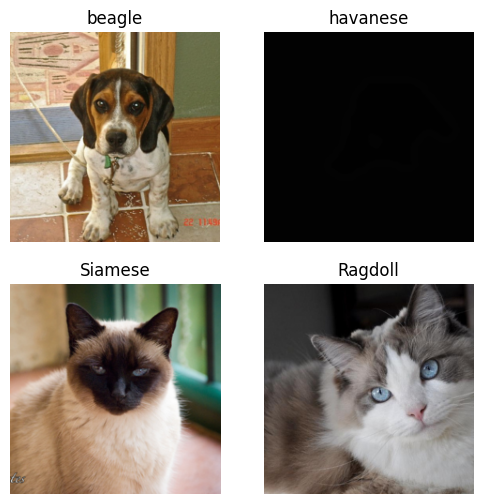

In [10]:
dls.show_batch(max_n=4)